In [1]:
import pandas as pd
pandas.DataFrame( data, index, columns, dtype, copy)
import seaborn as sns
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
dataset= pd.read_csv("C:/Users/pradeep/Downloads/kidneydataset.csv")
dataset[['htn','dm','cad','pe','ane']] = dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
dataset.rename(columns={'classification':'class'},inplace=True)



In [5]:
dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) 
dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
dataset.drop('id',axis=1,inplace=True)


In [25]:
dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [7]:
print(dataset.head())

    age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...    pcv    wc  \
0  48.0  80.0  1.020  1.0  0.0  NaN  0.0  0.0  0.0  121.0  ...     44  7800   
1   7.0  50.0  1.020  4.0  0.0  NaN  0.0  0.0  0.0    NaN  ...     38  6000   
2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  0.0  0.0  423.0  ...     31  7500   
3  48.0  70.0  1.005  4.0  0.0  0.0  1.0  1.0  0.0  117.0  ...     32  6700   
4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  106.0  ...     35  7300   

    rc  htn   dm  cad appet   pe  ane  class  
0  5.2  1.0  1.0  0.0   1.0  0.0  0.0    1.0  
1  NaN  0.0  0.0  0.0   1.0  0.0  0.0    1.0  
2  NaN  0.0  1.0  0.0   0.0  0.0  1.0    1.0  
3  3.9  1.0  0.0  0.0   0.0  1.0  1.0    1.0  
4  4.6  0.0  0.0  0.0   1.0  0.0  0.0    1.0  

[5 rows x 25 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


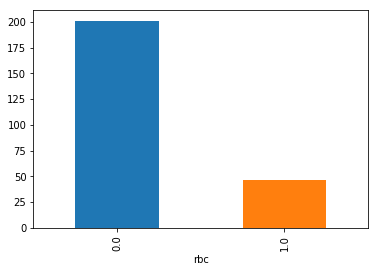

In [18]:
print (dataset.groupby('rbc').rbc.count().plot(kind="bar"))

In [20]:
print (dataset.groupby('appet').appet.count().plot(kind="scatter"))

ValueError: plot kind 'scatter' can only be used for data frames

In [16]:
print (dataset.groupby('class').bp.max())


class
0.0     80.0
1.0    180.0
Name: bp, dtype: float64


In [23]:
scatter_matrix(dataset)
plt.show()

NameError: name 'scatter_matrix' is not defined

In [24]:
dataset = DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
scatter_matrix(dataset, alpha=0.2)

NameError: name 'DataFrame' is not defined

In [31]:
def answer_to_question5(dataset):
    columns = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
    for each in columns:
        # printing the datatype of the columns after changing it to numeric
        print ("Data type of the value" + each + " is: " + str(pd.to_numeric(dataset[each], errors='coerce').dtype))


answer_to_question5(dataset)

Data type of the valueage is: float64
Data type of the valuebp is: float64
Data type of the valuebgr is: float64
Data type of the valuebu is: float64
Data type of the valuesc is: float64
Data type of the valuesod is: float64
Data type of the valuepot is: float64
Data type of the valuehemo is: float64
Data type of the valuepcv is: float64
Data type of the valuewc is: float64
Data type of the valuerc is: float64


In [35]:

def answer(dataset):
    dataset = dataset.replace(r'[\t\s]', '', regex=True).replace("?",np.nan)
    dataset.bp = dataset.bp.astype(float)
    print ("The max Bloop Pressure Having Chronic Kidney Disease is: ", max(dataset.loc[dataset['class'] == 'ckd', 'bp']))

answer(dataset)

C:\Users\pradeep\Anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [37]:
dataset=dataset.replace(r'\?+', np.nan, regex=True)
print (dataset)

      age     bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...    pcv  \
0    48.0   80.0  1.020  1.0  0.0  NaN  0.0  0.0  0.0  121.0  ...     44   
1     7.0   50.0  1.020  4.0  0.0  NaN  0.0  0.0  0.0    NaN  ...     38   
2    62.0   80.0  1.010  2.0  3.0  0.0  0.0  0.0  0.0  423.0  ...     31   
3    48.0   70.0  1.005  4.0  0.0  0.0  1.0  1.0  0.0  117.0  ...     32   
4    51.0   80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  106.0  ...     35   
5    60.0   90.0  1.015  3.0  0.0  NaN  NaN  0.0  0.0   74.0  ...     39   
6    68.0   70.0  1.010  0.0  0.0  NaN  0.0  0.0  0.0  100.0  ...     36   
7    24.0    NaN  1.015  2.0  4.0  0.0  1.0  0.0  0.0  410.0  ...     44   
8    52.0  100.0  1.015  3.0  0.0  0.0  1.0  1.0  0.0  138.0  ...     33   
9    53.0   90.0  1.020  2.0  0.0  1.0  1.0  1.0  0.0   70.0  ...     29   
10   50.0   60.0  1.010  2.0  4.0  NaN  1.0  1.0  0.0  490.0  ...     28   
11   63.0   70.0  1.010  3.0  0.0  1.0  1.0  1.0  0.0  380.0  ...     32   
12   68.0   

NameError: name 'style' is not defined

In [44]:
print(dataset.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')


In [48]:
print(dataset['class'])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
370    0.0
371    0.0
372    0.0
373    0.0
374    0.0
375    0.0
376    0.0
377    0.0
378    0.0
379    0.0
380    0.0
381    0.0
382    0.0
383    0.0
384    0.0
385    0.0
386    0.0
387    0.0
388    0.0
389    0.0
390    0.0
391    0.0
392    0.0
393    0.0
394    0.0
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: class, Length: 400, dtype: float64


In [56]:
m = 0
for i in range(len(dataset.bp)):
    if dataset["class"][i] == "ckd":
        if dataset.bp[i] > m:
            m = dataset.bp[i]
m

0

In [57]:
dataset2 = dataset.dropna(axis=0)
dataset2['class'].value_counts()

0.0    115
1.0     43
Name: class, dtype: int64

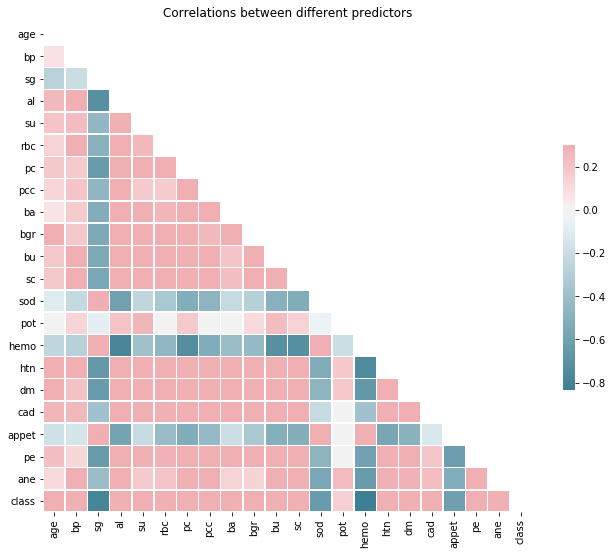

In [58]:
corr_df = dataset2.corr()
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

In [61]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset2.iloc[:,:-1], dataset2['class'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= dataset2['class'] )

In [62]:
print(X_train.shape)
print(X_test.shape)

(105, 24)
(53, 24)


In [ ]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_